# 1. Analyse descriptive (EDA)

**HYPOTHESES**

- H1 : les lancements récents (après 2015) sont plus nombreux que dans les années 1990 → vérifier le pic de Launch_year.

- H2 : la note moyenne (Rating_value) est légèrement biaisée vers le haut (> 3,5 / 5).

- H3 : les parfums très anciens accumulent plus de commentaires (Rating_count) que les nouveautés.

- H4 : le marché est concentré : 10 marques regroupent > 50 % des références.

- H6 : la catégorie Unisex est en forte progression récente (à vérifier plus tard en croisant Launch_year).

- H7 : les parfums à sillage “Énorme” sont minoritaires, peut- être plus présents dans la catégorie Oriental.

- H9 : la corrélation Rating_value – Rating_count est faible → popularité ≠ qualité perçue ? à creuser.

## 0. Imports et chargement données

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

FDS = pd.read_csv("FDS_clean.csv")


C:\Users\tapri\AppData\Local\Temp\ipykernel_6056\3294378679.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  FDS = pd.read_csv("FDS_clean.csv")


In [2]:
FDS.head()

,name,brand,brand_reduce,nose,nose_reduce,launch_year,launch_period,rating_value,rating_value_category,rating_count,...,base_note_cannabis,base_note_cocoa shell,base_note_dark woodsy notes,base_note_ebony tree,base_note_elemi,base_note_gunpowder,base_note_heather,base_note_juniper berry,base_note_oak moss,base_note_plum
0,#Cool Vibes,Zara,Zara,NaN,NaN,2020.0,2015-2020,4.23,"Elevée ]4.2 , 4.5]",13,...,0,0,0,0,0,0,0,0,0,0
1,#Weekend Plan,Zara,Zara,NaN,NaN,2020.0,2015-2020,4.33,"Elevée ]4.2 , 4.5]",3,...,0,0,0,0,0,0,0,0,0,0
2,01 Magic Onsen,Zara,Zara,NaN,NaN,2017.0,2015-2020,3.29,"Très faible [0 , 3.3]",38,...,0,0,0,0,0,0,0,0,0,0
3,02 Sweet Vanilla,Zara,Zara,NaN,NaN,2017.0,2015-2020,3.93,"Moyenne ]3.9 , 4.2]",127,...,0,0,0,0,0,0,0,0,0,0
4,Amber Vanilla,Zara,Zara,NaN,NaN,NaN,NaN,4.23,"Elevée ]4.2 , 4.5]",35,...,0,0,0,0,0,0,0,0,0,0


## 1.1 Aperçu statistique des variables numériques  
Nous examinons les distributions de `Launch_year`, `Rating_value` et `Rating_count`.


Stat descriptives

In [20]:
stats = FDS[['launch_year', 'rating_value', 'rating_count']].describe()
print("Statistiques descriptives :")
print(stats)

Statistiques descriptives :
        launch_year  rating_value  rating_count
count  11270.000000  11449.000000  12002.000000
mean    2015.427950      4.010179    572.178387
std       10.980468      0.428063   1757.135726
min     1781.000000      1.000000      0.000000
25%     2012.000000      3.830000     15.000000
50%     2018.000000      4.030000     88.000000
75%     2022.000000      4.230000    399.750000
max     2025.000000      5.000000  31825.000000


Graphes

C:\Users\tapri\AppData\Local\Temp\ipykernel_19680\2735199582.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  FDS = pd.read_csv("FDS_clean.csv")


,count,mean,std,min,25%,50%,75%,max
launch_year,19858.0,2014.079917,13.578242,1533.0,2011.00,2017.0,2021.00,2025.0
rating_value,21091.0,3.989994,0.401140,1.0,3.81,4.0,4.21,5.0
rating_count,21778.0,557.835292,1645.996011,0.0,21.00,99.0,398.00,31826.0


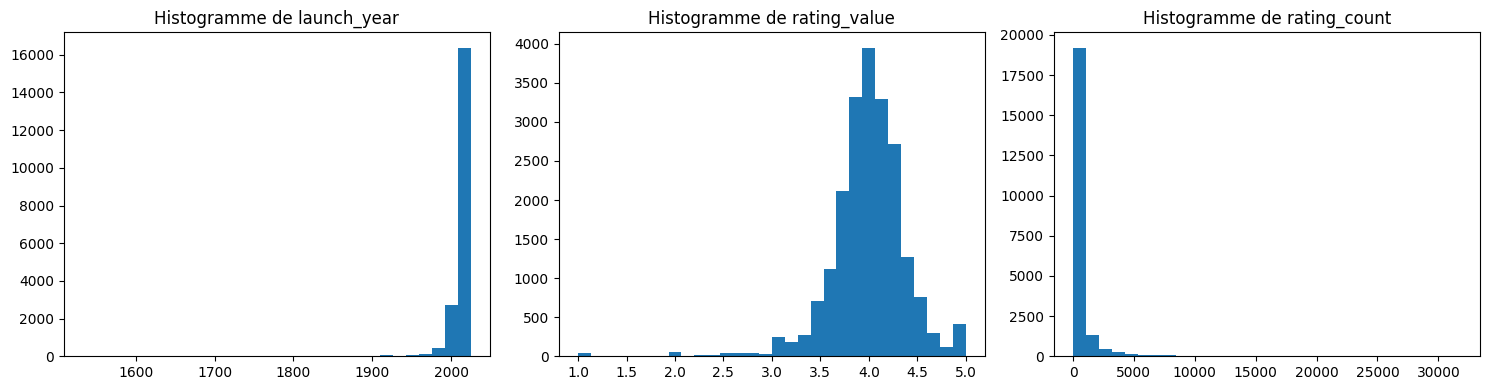

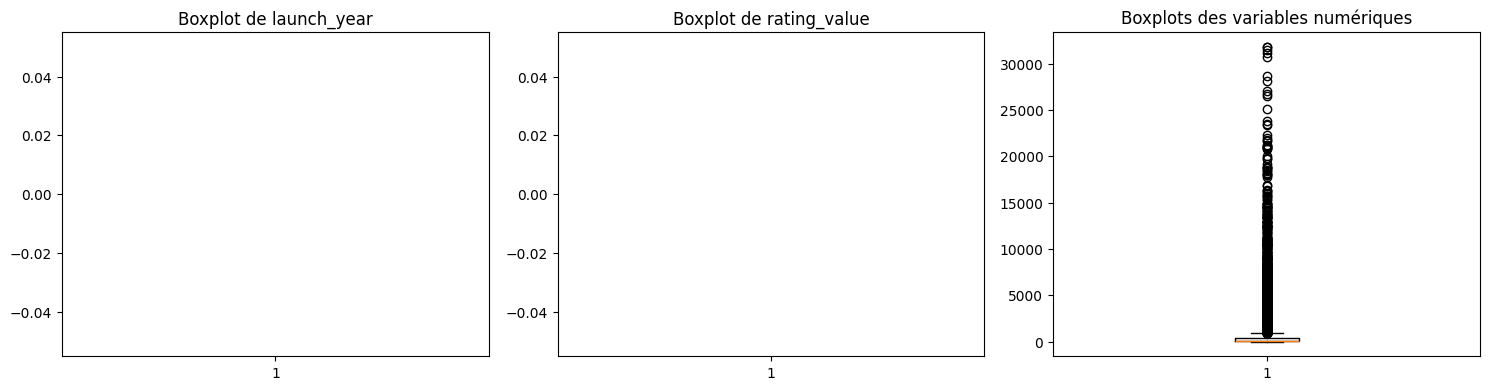

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# ⬇️ On prend daaset CLEAN
FDS = pd.read_csv("FDS_clean.csv")

# --- Statistiques descriptives
stats = FDS[["launch_year", "rating_value", "rating_count"]].describe().T
display(stats)

# --- Histogrammes
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ["launch_year", "rating_value", "rating_count"]):
    ax.hist(FDS[col], bins=30)
    ax.set_title(f"Histogramme de {col}")
plt.tight_layout()
plt.show()

# --- Boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, col in zip(axes, ["launch_year", "rating_value", "rating_count"]):
    ax.boxplot(FDS[col])
    ax.set_title(f"Boxplot de {col}")
plt.tight_layout()
plt.title("Boxplots des variables numériques")
plt.show()


## 1.2 Fréquences des modalités qualitatives  

Nous regardons successivement : **marques**, **parfumeurs**, **accords principaux**, **genres**, **longevity** et **sillage**.


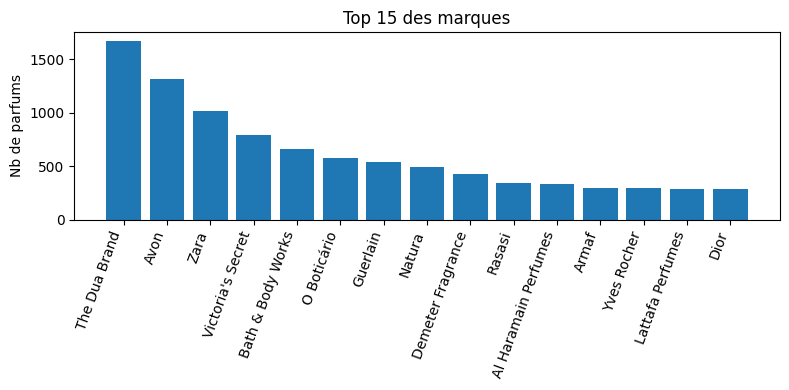

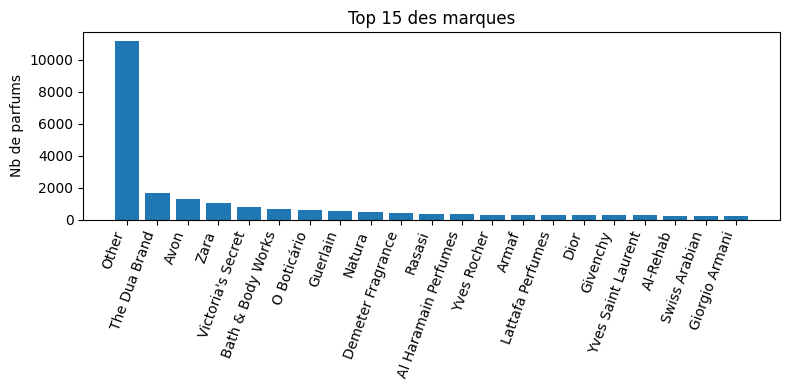

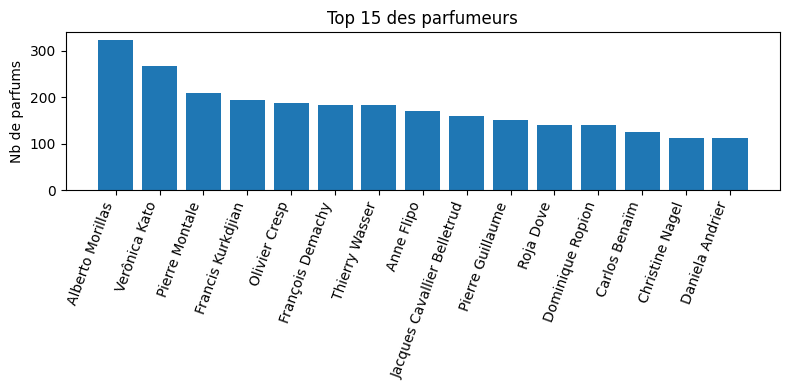

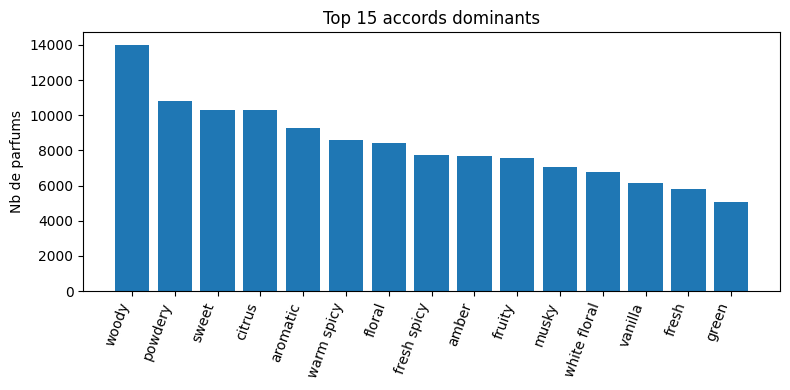

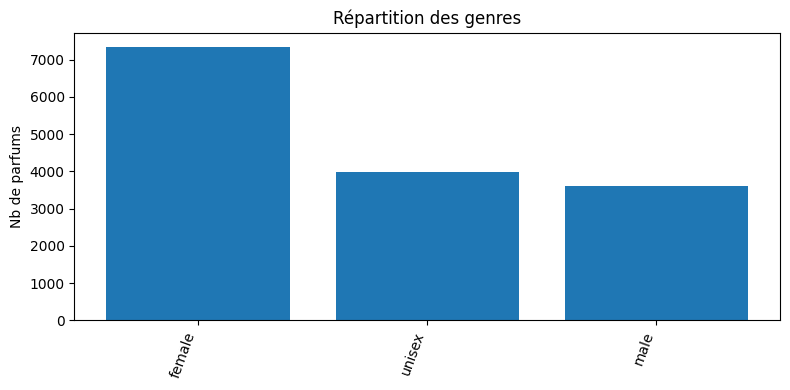

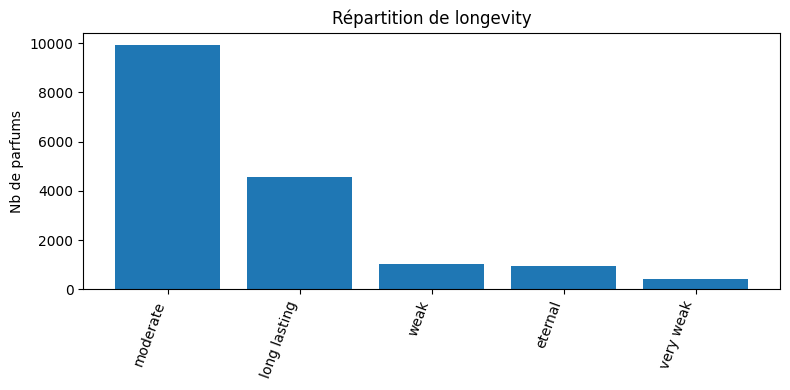

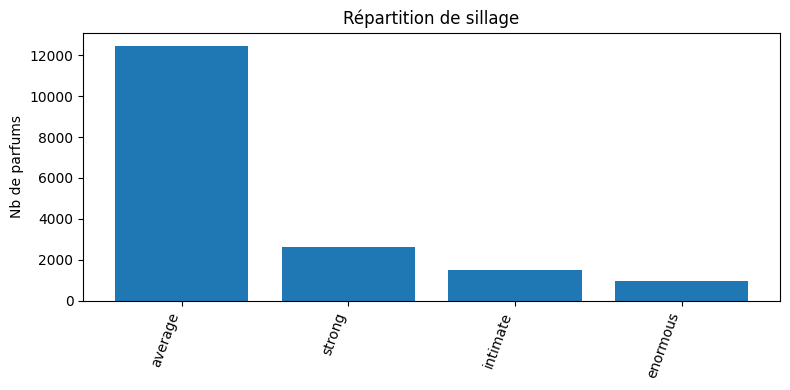

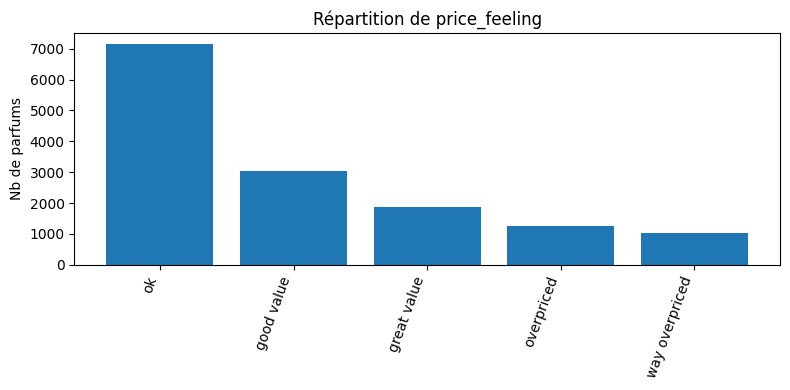

In [22]:
def bar_top(series, k=15, title=""):
    counts = series.value_counts().head(k)
    plt.figure(figsize=(8,4))
    plt.bar(counts.index.astype(str), counts.values)
    plt.xticks(rotation=70, ha="right")
    plt.title(title)
    plt.ylabel("Nb de parfums")
    plt.tight_layout()
    plt.show()

# 1. Marques les plus représentées
bar_top(FDS['brand'], k=15, title=f"Top {k} des marques")

# 1.1 Marques les plus représentées VS le reste
bar_top(FDS['brand_reduce'], k=21, title=f"Top {k} des marques")

# 2. Parfumeurs les plus prolifiques
bar_top(FDS["nose"], k=15, title="Top 15 des parfumeurs")

# 3. Accords dominants (colonnes accord_*)
accord_cols = [c for c in FDS.columns if c.startswith("accord_")]
accord_freq = FDS[accord_cols].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(8,4))
plt.bar(accord_freq.index.str.replace("accord_", ""), accord_freq.values)
plt.xticks(rotation=70, ha="right")
plt.title("Top 15 accords dominants")
plt.ylabel("Nb de parfums")
plt.tight_layout()
plt.show()

# 4. Répartition du genre
bar_top(FDS["gender"], k=3, title="Répartition des genres")

# 5 & 6. Longevity et Sillage et Prix ressenti
for col in ["longevity", "sillage", "price_feeling"]:
    bar_top(FDS[col], title=f"Répartition de {col}")


## 1.3 Corrélations numériques  

Nous inspectons la matrice de corrélation (méthode Spearman).



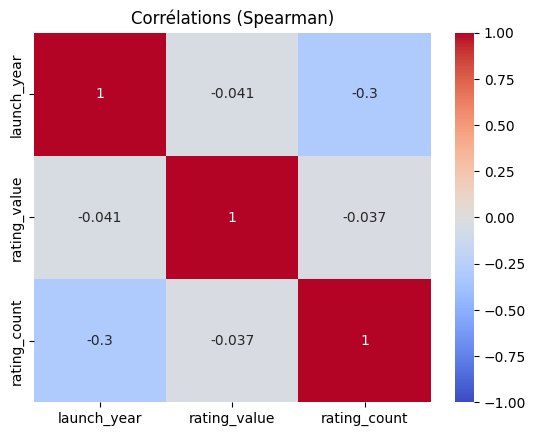

In [23]:
import seaborn as sns

corr = FDS[["launch_year", "rating_value", "rating_count"]].corr(method="spearman")
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Corrélations (Spearman)")
plt.show()


## 1.4 Synthèse provisoire  


- **H1 :** Les lancements récents (après 2015) sont effectivement plus nombreux, avec un pic visible dans les années récentes.  
- **H2 :** La note moyenne (rating_value) est légèrement biaisée vers le haut, avec une majorité des parfums ayant une note supérieure à 3,5.  
- **H3 :** : Les parfums anciens accumulent effectivement un plus grand nombre de vote (rating_count), confirmant une corrélation positive entre l'ancienneté et le nombre de commentaires.
- **H4 :** : Le marché est n'est pas ci concentré : les 10 premières marques regroupent moins de 40 % des références.

- **H6 :** :
- **H7 :** :

- **H9 :** : 


